# Telecom companies face a major challenge with customer churn (customers leaving the service), which directly impacts their revenue and growth.

Retaining existing customers is more cost-effective than acquiring new ones. Hence, the company needs to analyze the factors driving customer churn and identify patterns that help predict which customers are most likely to leave.

The goal of this analysis is to:

1. Understand the reasons behind customer churn

2. Identify high-risk customer segments

3. Provide actionable business insights and recommendations to reduce churn

By addressing this problem, the company can develop targeted retention strategies, improve customer satisfaction, and increase profitability.

# Import the Library and load the dataset 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv('Telco-Customer churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [4]:
print("Dataset Shape:", df.shape)

Dataset Shape: (7032, 21)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [8]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

# Data Cleaning 

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [10]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [11]:
df.dropna(subset=['TotalCharges'], inplace = True)

df.reset_index(drop = True, inplace = True)

In [12]:
print("Dataset Shape after cleaning:", df.shape)
print(df.isnull().sum())

Dataset Shape after cleaning: (7032, 21)
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [13]:
for col in df.columns:
    print(f"{col}:{df[col].unique()}")

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (autom

# Churn Rate 

In [14]:
print(df['Churn'].value_counts())

0    5163
1    1869
Name: Churn, dtype: int64


In [15]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

In [16]:
# Calculate total customers
total_customers = df.shape[0]

# Calculate total churned customers
churned_customers = df['Churn'].sum()

# Calculate churn rate
churn_rate = (churned_customers / total_customers) * 100

# Print results
print(f"Total Customers: {total_customers}")
print(f"Churned Customers: {churned_customers}")
print(f"Churn Rate: {churn_rate:.2f}%")

Total Customers: 7032
Churned Customers: 0.0
Churn Rate: 0.00%


# Exploratory Data Analysis(EDA)

In [17]:
print(df.head())
print(f"Dataset Shape:{df.shape}")
print(df.dtypes)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [18]:
print(df.isnull().sum())

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn               7032
dtype: int64


In [19]:
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True)*100)

Series([], Name: Churn, dtype: int64)
Series([], Name: Churn, dtype: float64)


#  Why did customer leave 

# Contract Type 


In [27]:
print(df.head())
print(df.columns)
print(df.shape)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [29]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [31]:
print(df['Churn'].isnull().sum())

7032


In [32]:
df=df.dropna(subset=['Churn'])

In [33]:
df=pd.read_csv('Telco-Customer churn.csv')
print(df['Churn'].unique())

[0 1]


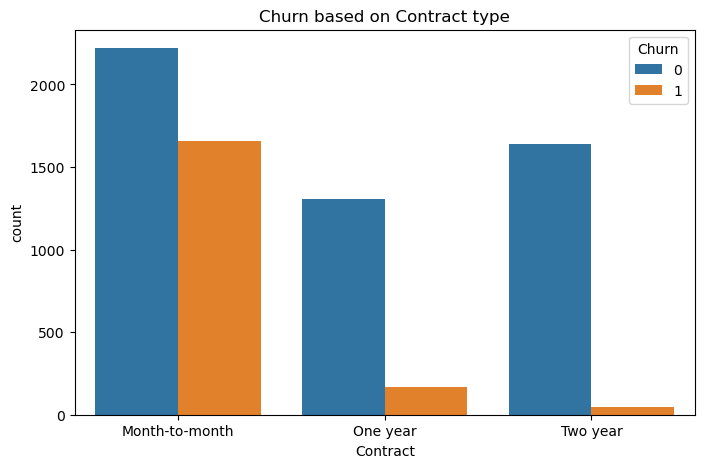

In [34]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,5))
sns.countplot(x='Contract',hue='Churn',data=df)
plt.title('Churn based on Contract type')
plt.show()

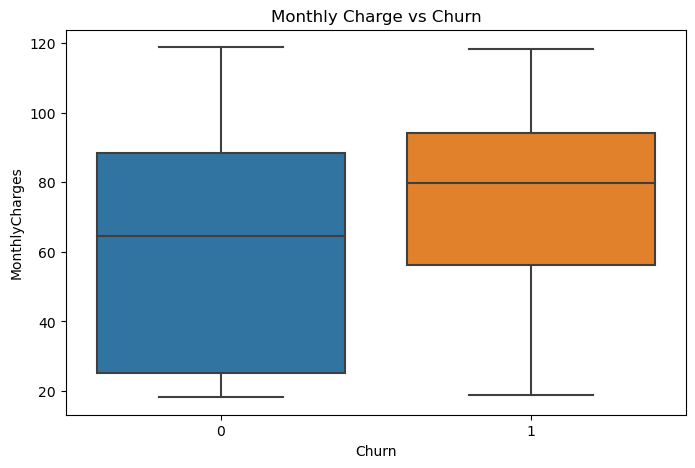

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn',y='MonthlyCharges',data=df)
plt.title('Monthly Charge vs Churn')
plt.show()

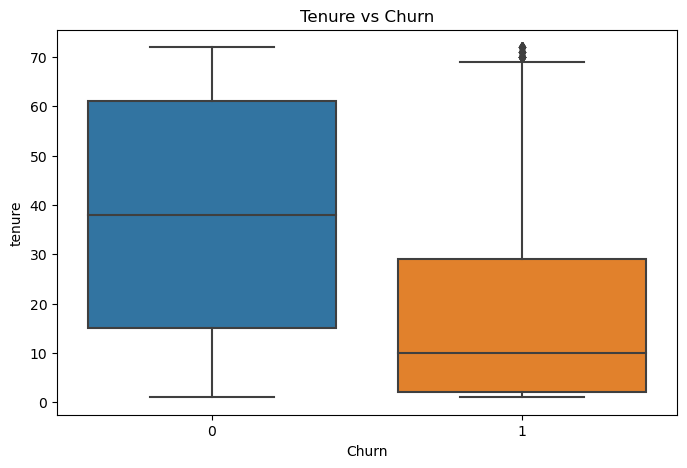

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn',y='tenure',data=df)
plt.title('Tenure vs Churn')
plt.show()

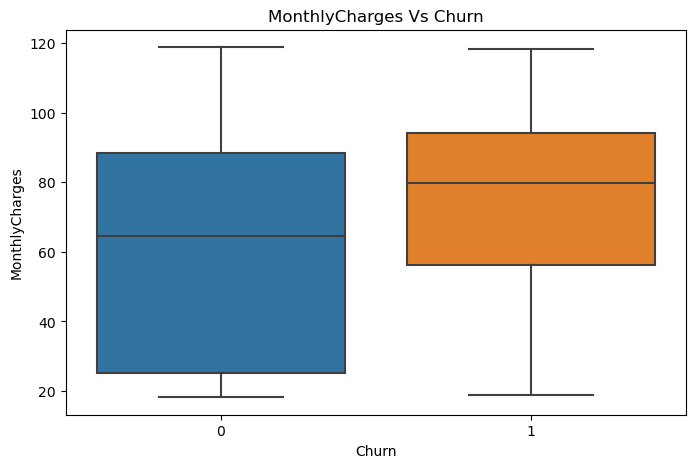

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn',y='MonthlyCharges',data=df)
plt.title('MonthlyCharges Vs Churn')
plt.show()

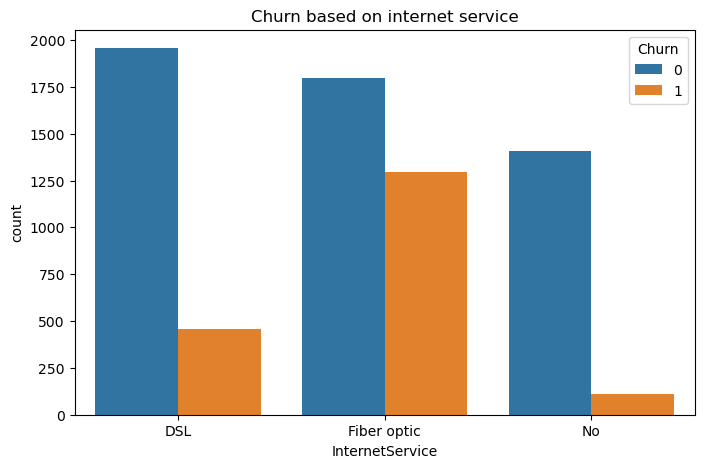

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(x='InternetService', hue='Churn' , data=df)
plt.title('Churn based on internet service')
plt.show()

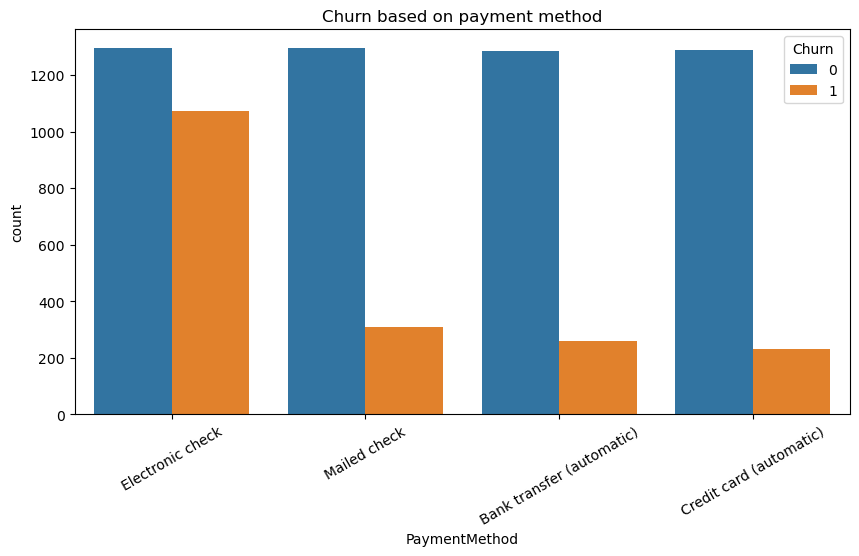

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x='PaymentMethod',hue='Churn',data=df)
plt.title('Churn based on payment method')
plt.xticks(rotation=30)
plt.show()

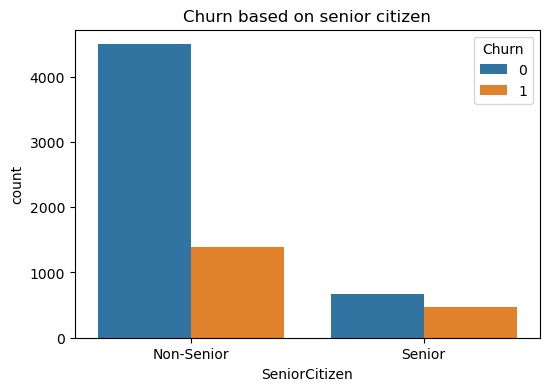

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)
plt.title('Churn based on senior citizen')
plt.xticks([0,1],['Non-Senior','Senior'])
plt.show()

In [41]:
df.to_csv('Telco-Customer_churn_cleaned.csv',index=False)

In [42]:
import pandas as pd
df=pd.read_csv("Telco-Customer_churn_cleaned.csv")
df.to_excel("Telco-Customer_churn_cleaned.xlsx",index=False)

In [43]:
from IPython.display import FileLink 
FileLink("Telco-Customer_churn_cleaned.xlsx")

C:\Users\mk\Telco-Customer_churn_cleaned.xlsx

## Final project summary:

1. Customer with ***Month-to-month contracts*** have the highest churn rate. 
2. ***Electronic check payment*** are mostle used by Churned Customers.
3. ***Senior Citizen*** churn slightly more than by churned customers.
4. Customers using ***Fibre optics Internet*** tends to churn more. 
5. ***High Monthly Charges*** are linked with high churn probability. 

## Recommendations:

1. offers incentives to month-to-month customers to switch to long-term contracts. 
2. Provides personalized plans for fibre optics customers.
3. Monitor customers with high monthly charges for retention efforts.